# Assignment: Ionosphere Data Problem

### Dataset Description: 

This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

### Attribute Information:

- All 34 are continuous
- The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.

 <br><br>

<table border="1"  cellpadding="6">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">351</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Integer,Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">34</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">N/A</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Classification</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">N/A</p></td>
	</tr>
    </tbody>
    </table>

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature ) or any usless column.
- Shuffle the data if needed.
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 60 and 40 ratio.
- Encode labels.
- Model : 1 hidden layers including 16 unit.
- Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)
- Train the Model with Epochs (100).
- If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
- Prediction should be > **92%**
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/ionosphere_data.csv)

In [1]:
import pandas as pd
import numpy as np

#customizing output of DataFrame
pd.set_option('display.max_columns', 40) 
pd.set_option('display.max_rows', 500)  

In [2]:
d = pd.read_csv('ionosphere_data.csv')

In [3]:
d

feature1  feature2  feature3  feature4  feature5  feature6  feature7  \
0           1         0   0.99539  -0.05889   0.85243   0.02306   0.83398   
1           1         0   1.00000  -0.18829   0.93035  -0.36156  -0.10868   
2           1         0   1.00000  -0.03365   1.00000   0.00485   1.00000   
3           1         0   1.00000  -0.45161   1.00000   1.00000   0.71216   
4           1         0   1.00000  -0.02401   0.94140   0.06531   0.92106   
5           1         0   0.02337  -0.00592  -0.09924  -0.11949  -0.00763   
6           1         0   0.97588  -0.10602   0.94601  -0.20800   0.92806   
7           0         0   0.00000   0.00000   0.00000   0.00000   1.00000   
8           1         0   0.96355  -0.07198   1.00000  -0.14333   1.00000   
9           1         0  -0.01864  -0.08459   0.00000   0.00000   0.00000   
10          1         0   1.00000   0.06655   1.00000  -0.18388   1.00000   
11          1         0   1.00000  -0.54210   1.00000  -1.00000   1.00000   
12          1         0   1.00000  -0.16316   1.00000  -0.10169   0.99999   
13          1         0   1.00000  -0.86701   1.00000   0.22280   0.85492   
14          1         0   1.00000   0.07380   1.00000   0.03420   1.00000   
15          1         0   0.50932  -0.93996   1.00000   0.26708  -0.03520   
16          1         0   0.99645   0.06468   1.00000  -0.01236   0.97811   
17          0         0   0.00000   0.00000  -1.00000  -1.00000   1.00000   
18          1         0   0.67065   0.02528   0.66626   0.05031   0.57197   
19          0         0   1.00000  -1.00000   0.00000   0.00000   0.00000   
20          1         0   1.00000  -0.00612   1.00000  -0.09834   1.00000   
21          0         0   1.00000   1.00000   0.00000   0.00000   0.00000   
22          1         0   0.96071   0.07088   1.00000   0.04296   1.00000   
23          0         0  -1.00000   1.00000   0.00000   0.00000   0.00000   
24          1         0   1.00000  -0.06182   1.00000   0.02942   1.00000   
25          1         0   1.00000   0.57820   1.00000  -1.00000   1.00000   
26          1         0   1.00000  -0.08714   1.00000  -0.17263   0.86635   
27          0         0  -1.00000  -1.00000   0.00000   0.00000  -1.00000   
28          1         0   1.00000   0.08380   1.00000   0.17387   1.00000   
29          0         0  -1.00000  -1.00000   1.00000   1.00000   1.00000   
30          1         0   1.00000  -0.14236   1.00000  -0.16256   1.00000   
31          1         0   1.00000  -1.00000   1.00000   1.00000   1.00000   
32          1         0   0.88208  -0.14639   0.93408  -0.11057   0.92100   
33          1         0   0.71253  -0.02595   0.41287  -0.23067   0.98019   
34          1         0   1.00000  -0.15899   0.72314   0.27686   0.83443   
35          1         0   0.66161  -1.00000   1.00000   1.00000   1.00000   
36          1         0   1.00000   0.00433   1.00000  -0.01209   1.00000   
37          0         0   1.00000   1.00000   1.00000  -1.00000   0.00000   
38          1         0   0.91241   0.04347   0.94191   0.02280   0.94705   
39          1         0   1.00000   0.02461   0.99672   0.04861   0.97545   
40          1         0   1.00000   0.06538   1.00000   0.20746   1.00000   
41          1         0  -1.00000  -1.00000   1.00000   1.00000   1.00000   
42          1         0   0.90932   0.08791   0.86528   0.16888   1.00000   
43          1         0  -0.64286  -1.00000   1.00000   0.82857   1.00000   
44          1         0   0.99025  -0.05785   0.99793  -0.13009   0.98663   
45          0         0   0.00000   0.00000   0.00000   0.00000   0.00000   
46          1         0   1.00000  -0.03730   1.00000  -0.07383   0.99601   
47          1         0   0.94598  -0.02685  -1.00000   0.26131  -0.36393   
48          1         0   0.98166   0.00874   0.98103  -0.03818   0.97565   
49          1         0   0.00000   0.00000   1.00000   0.51724   0.00000   
50          1         0   0.84134  -0.18362   0.43644   0.02919   0.93421   
5

### Check Missing Values

In [4]:
display(d.describe(), d.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature2   351 non-null    int64  
 2   feature3   351 non-null    float64
 3   feature4   351 non-null    float64
 4   feature5   351 non-null    float64
 5   feature6   351 non-null    float64
 6   feature7   351 non-null    float64
 7   feature8   351 non-null    float64
 8   feature9   351 non-null    float64
 9   feature10  351 non-null    float64
 10  feature11  351 non-null    float64
 11  feature12  351 non-null    float64
 12  feature13  351 non-null    float64
 13  feature14  351 non-null    float64
 14  feature15  351 non-null    float64
 15  feature16  351 non-null    float64
 16  feature17  351 non-null    float64
 17  feature18  351 non-null    float64
 18  feature19  351 non-null    float64
 19  feature20  351 non-null    float64
 20  feature21 

feature1  feature2    feature3    feature4    feature5    feature6  \
count  351.000000     351.0  351.000000  351.000000  351.000000  351.000000   
mean     0.891738       0.0    0.641342    0.044372    0.601068    0.115889   
std      0.311155       0.0    0.497708    0.441435    0.519862    0.460810   
min      0.000000       0.0   -1.000000   -1.000000   -1.000000   -1.000000   
25%      1.000000       0.0    0.472135   -0.064735    0.412660   -0.024795   
50%      1.000000       0.0    0.871110    0.016310    0.809200    0.022800   
75%      1.000000       0.0    1.000000    0.194185    1.000000    0.334655   
max      1.000000       0.0    1.000000    1.000000    1.000000    1.000000   

         feature7    feature8    feature9   feature10   feature11   feature12  \
count  351.000000  351.000000  351.000000  351.000000  351.000000  351.000000   
mean     0.550095    0.119360    0.511848    0.181345    0.476183    0.155040   
std      0.492654    0.520750    0.507066    0.483851    0.563496    0.494817   
min     -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   
25%      0.211310   -0.054840    0.087110   -0.048075    0.021120   -0.065265   
50%      0.728730    0.014710    0.684210    0.018290    0.667980    0.028250   
75%      0.969240    0.445675    0.953240    0.534195    0.957895    0.482375   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        feature13   feature14   feature15   feature16   feature17   feature18  \
count  351.000000  351.000000  351.000000  351.000000  351.000000  351.000000   
mean     0.400801    0.093414    0.344159    0.071132    0.381949   -0.003617   
std      0.622186    0.494873    0.652828    0.458371    0.618020    0.496762   
min     -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   
25%      0.000000   -0.073725    0.000000   -0.081705    0.000000   -0.225690   
50%      0.644070    0.030270    0.601940    0.000000    0.590910    0.000000   
75%      0.955505    0.374860    0.919330    0.308975    0.935705    0.195285   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        feature19   feature20   feature21   feature22   feature23   feature24  \
count  351.000000  351.000000  351.000000  351.000000  351.000000  351.000000   
mean     0.359390   -0.024025    0.336695    0.008296    0.362475   -0.057406   
std      0.626267    0.519076    0.609828    0.518166    0.603767    0.527456   
min     -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   
25%      0.000000   -0.234670    0.000000   -0.243870    0.000000   -0.366885   
50%      0.576190    0.000000    0.499090    0.000000    0.531760    0.000000   
75%      0.899265    0.134370    0.894865    0.188760    0.911235    0.164630   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        feature25   feature26   feature27   feature28   feature29   feature30  \
count  351.000000  351.000000  351.000000  351.000000  351.000000  351.000000   
mean     0.396135   -0.071187    0.541641   -0.069538    0.378445   -0.027907   
std      0.578451    0.508495    0.516205    0.550025    0.575886    0.507974   
min     -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   
25%      0.000000   -0.332390    0.286435   -0.443165    0.000000   -0.236885   
50%      0.553890   -0.015050    0.708240   -0.017690    0.496640    0.000000   
75%      0.905240    0.156765    0.999945    0.153535    0.883465    0.154075   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        feature31   feature32   feature33   feature34  
count  351.000000  351.000000  351.000000  351.000000  
mean     0.352514   -0.003794    0.349364    0.014480  
std      0.571483    0.513574    0.522663    0.468337  
min     -1.000000   -1.000000   -1.000000   -1.000000  
25%      0.000000   -0.242595    0.000000   -0.165350  
50%      0.442770    0.000000    0.409560

None

In [7]:
d.drop('feature2', axis='columns',inplace=True)

### Encoding labels.

In [8]:
d['label'] = d['label'].map({'g':1,'b':0})

In [9]:
d.label.head(10)

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    0
Name: label, dtype: int64

### Making dataset containing equal 'b' & 'g' in label column

In [10]:
g = d[d.label==1]
b = d[d.label==0]
g.shape, b.shape

((225, 34), (126, 34))

In [11]:
display(g,b)

feature1  feature3  feature4  feature5  feature6  feature7  feature8  \
0           1   0.99539  -0.05889   0.85243   0.02306   0.83398  -0.37708   
2           1   1.00000  -0.03365   1.00000   0.00485   1.00000  -0.12062   
4           1   1.00000  -0.02401   0.94140   0.06531   0.92106  -0.23255   
6           1   0.97588  -0.10602   0.94601  -0.20800   0.92806  -0.28350   
8           1   0.96355  -0.07198   1.00000  -0.14333   1.00000  -0.21313   
10          1   1.00000   0.06655   1.00000  -0.18388   1.00000  -0.27320   
12          1   1.00000  -0.16316   1.00000  -0.10169   0.99999  -0.15197   
14          1   1.00000   0.07380   1.00000   0.03420   1.00000  -0.05563   
16          1   0.99645   0.06468   1.00000  -0.01236   0.97811   0.02498   
18          1   0.67065   0.02528   0.66626   0.05031   0.57197   0.18761   
20          1   1.00000  -0.00612   1.00000  -0.09834   1.00000  -0.07649   
22          1   0.96071   0.07088   1.00000   0.04296   1.00000   0.09313   
24          1   1.00000  -0.06182   1.00000   0.02942   1.00000  -0.05131   
26          1   1.00000  -0.08714   1.00000  -0.17263   0.86635  -0.81779   
28          1   1.00000   0.08380   1.00000   0.17387   1.00000  -0.13308   
30          1   1.00000  -0.14236   1.00000  -0.16256   1.00000  -0.23656   
32          1   0.88208  -0.14639   0.93408  -0.11057   0.92100  -0.16450   
34          1   1.00000  -0.15899   0.72314   0.27686   0.83443  -0.58388   
36          1   1.00000   0.00433   1.00000  -0.01209   1.00000  -0.02960   
38          1   0.91241   0.04347   0.94191   0.02280   0.94705   0.05345   
40          1   1.00000   0.06538   1.00000   0.20746   1.00000   0.26281   
42          1   0.90932   0.08791   0.86528   0.16888   1.00000   0.16598   
44          1   0.99025  -0.05785   0.99793  -0.13009   0.98663  -0.19430   
46          1   1.00000  -0.03730   1.00000  -0.07383   0.99601  -0.11039   
48          1   0.98166   0.00874   0.98103  -0.03818   0.97565  -0.05699   
50          1   0.84134  -0.18362   0.43644   0.02919   0.93421  -0.00267   
52          1   1.00000   1.00000   1.00000   1.00000   0.91010   1.00000   
54          1   0.95659   0.08143   0.97487  -0.05667   0.97165  -0.08484   
56          1   1.00000  -0.02259   1.00000  -0.04494   1.00000  -0.06682   
58          1   1.00000   0.05812   0.94525   0.07418   0.99952   0.13231   
60          1   1.00000   0.09771   1.00000   0.12197   1.00000   0.22574   
62          1   1.00000   0.16801   0.99352   0.16334   0.94616   0.33347   
64          1   1.00000  -0.41457   1.00000   0.76131   0.87060   0.18593   
66          1   1.00000   0.28046   1.00000   0.02477   1.00000   0.07764   
68          1   1.00000   0.67784   0.81309   0.82021   0.43019   1.00000   
70          1   1.00000   0.03529   1.00000   0.18281   1.00000   0.26968   
72          1   0.96087   0.08620   0.96760   0.19279   0.96026   0.27451   
74          1   1.00000   0.05070   1.00000   0.10827   1.00000   0.19498   
76          1   1.00000   0.04078   1.00000   0.11982   1.00000   0.16159   
78          1   1.00000   0.24168   1.00000   0.48590   1.00000   0.72973   
80          1   1.00000  -0.06604   1.00000   0.62937   1.00000   0.09557   
82          1   0.92277   0.07804   0.92679   0.16251   0.89702   0.24618   
84          1   0.74852  -0.02811   0.65680  -0.05178   0.80621   0.02811   
86          1   0.67547   0.04528   0.76981  -0.10566   0.77358   0.03774   
88          1   0.57647  -0.01569   0.40392   0.00000   0.38431   0.12941   
90          1   0.88305  -0.21996   1.00000   0.36373   0.82403   0.19206   
92          1   0.70870  -0.24783   0.64348   0.04348   0.45217   0.38261   
94          1   0.29202   0.13582   0.45331   0.16808   0.51783  -0.00509   
96          1   0.90116   0.16607   0.79299   0.37379   0.72990   0.50515   
97          1   0.97714   0.19049   0.82683   0.46259   0.71771   0.58732   
99          1   0.74084   0.04974   0.79074   0.02543   0.78575   0.03793   
1

feature1  feature3  feature4  feature5  feature6  feature7  feature8  \
1           1   1.00000  -0.18829   0.93035  -0.36156  -0.10868  -0.93597   
3           1   1.00000  -0.45161   1.00000   1.00000   0.71216  -1.00000   
5           1   0.02337  -0.00592  -0.09924  -0.11949  -0.00763  -0.11824   
7           0   0.00000   0.00000   0.00000   0.00000   1.00000  -1.00000   
9           1  -0.01864  -0.08459   0.00000   0.00000   0.00000   0.00000   
11          1   1.00000  -0.54210   1.00000  -1.00000   1.00000  -1.00000   
13          1   1.00000  -0.86701   1.00000   0.22280   0.85492  -0.39896   
15          1   0.50932  -0.93996   1.00000   0.26708  -0.03520  -1.00000   
17          0   0.00000   0.00000  -1.00000  -1.00000   1.00000   1.00000   
19          0   1.00000  -1.00000   0.00000   0.00000   0.00000   0.00000   
21          0   1.00000   1.00000   0.00000   0.00000   0.00000   0.00000   
23          0  -1.00000   1.00000   0.00000   0.00000   0.00000   0.00000   
25          1   1.00000   0.57820   1.00000  -1.00000   1.00000  -1.00000   
27          0  -1.00000  -1.00000   0.00000   0.00000  -1.00000   1.00000   
29          0  -1.00000  -1.00000   1.00000   1.00000   1.00000  -1.00000   
31          1   1.00000  -1.00000   1.00000   1.00000   1.00000  -1.00000   
33          1   0.71253  -0.02595   0.41287  -0.23067   0.98019  -0.09473   
35          1   0.66161  -1.00000   1.00000   1.00000   1.00000  -0.67321   
37          0   1.00000   1.00000   1.00000  -1.00000   0.00000   0.00000   
39          1   1.00000   0.02461   0.99672   0.04861   0.97545   0.07143   
41          1  -1.00000  -1.00000   1.00000   1.00000   1.00000  -0.14375   
43          1  -0.64286  -1.00000   1.00000   0.82857   1.00000  -1.00000   
45          0   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   
47          1   0.94598  -0.02685  -1.00000   0.26131  -0.36393   0.35639   
49          1   0.00000   0.00000   1.00000   0.51724   0.00000   0.00000   
51          0   1.00000   1.00000   1.00000  -1.00000   0.00000   0.00000   
53          1  -0.67935  -1.00000  -1.00000   1.00000   1.00000   0.63317   
55          1   0.08333  -0.20685  -1.00000   1.00000  -1.00000   1.00000   
57          0  -1.00000   1.00000   1.00000  -1.00000  -1.00000   1.00000   
59          1   0.17188  -1.00000  -1.00000   1.00000   0.00000   0.00000   
61          1   0.01667  -0.35625   0.00000   0.00000   0.00000   0.00000   
63          1   0.63816   1.00000   0.20833  -1.00000   1.00000   1.00000   
65          1   0.84783   0.10598   1.00000   0.39130   1.00000  -1.00000   
67          0   1.00000  -1.00000   1.00000  -1.00000   1.00000  -1.00000   
69          1   1.00000   1.00000   1.00000  -1.00000   1.00000  -1.00000   
71          0   1.00000  -1.00000   1.00000   1.00000  -1.00000  -1.00000   
73          1   0.69444   0.38889   0.00000   0.00000  -0.32937   0.69841   
75          0   1.00000   1.00000   0.00000   0.00000   1.00000  -1.00000   
77          0   1.00000   1.00000   1.00000  -1.00000   1.00000   1.00000   
79          0   1.00000   1.00000   1.00000  -1.00000   1.00000   1.00000   
81          0   1.00000  -1.00000   1.00000   1.00000   1.00000   1.00000   
83          1   0.68198  -0.17314   0.82332   0.21908   0.46643   0.32862   
85          1   0.39179  -0.06343   0.97464   0.04328   1.00000   1.00000   
87          1   0.72727  -0.05000   0.89241   0.03462   1.00000   0.72727   
89          1   0.41932   0.12482   0.35000   0.12500   0.23182   0.27955   
91          1   0.84557  -0.08580  -0.31745  -0.80553  -0.08961  -0.56435   
93          1  -0.54180   0.14861  -0.33746   0.73375   0.52012  -0.13932   
95          1   0.79157   0.16851   0.00000   0.00000   0.56541   0.06874   
98          1  -1.00000  -1.00000   0.00000   0.00000   0.50814  -0.78502   
100         1   1.00000  -1.00000   0.00000   0.00000   0.77941  -0.99265   
102         0   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   
1

In [12]:
g = g.sample(n=len(b), random_state=444).copy()
display(g.shape,g)

(126, 34)

feature1  feature3  feature4  feature5  feature6  feature7  feature8  \
32          1   0.88208  -0.14639   0.93408  -0.11057   0.92100  -0.16450   
271         1   0.47938  -0.12371   0.42784  -0.12371   0.70103  -0.39175   
273         1   0.50112  -0.03596   0.61124   0.01348   0.58876   0.01573   
58          1   1.00000   0.05812   0.94525   0.07418   0.99952   0.13231   
34          1   1.00000  -0.15899   0.72314   0.27686   0.83443  -0.58388   
76          1   1.00000   0.04078   1.00000   0.11982   1.00000   0.16159   
181         1   1.00000   0.24077   0.99815   0.00369   0.80244  -0.30133   
103         1   0.95704  -0.12095   0.63318  -0.12690   0.96365  -0.18242   
131         1   0.64122   0.01403   0.34146  -0.02439   0.52751   0.03466   
80          1   1.00000  -0.06604   1.00000   0.62937   1.00000   0.09557   
337         1   0.90147   0.41786   0.64131   0.75725   0.30440   0.95148   
282         1   0.93972   0.28082   0.80486   0.52821   0.58167   0.73151   
141         1   0.95202   0.02254   0.93757  -0.01272   0.93526   0.01214   
241         1   0.88103  -0.00857   0.89818  -0.02465   0.94105  -0.01822   
0           1   0.99539  -0.05889   0.85243   0.02306   0.83398  -0.37708   
267         1   0.58940  -0.60927   0.85430   0.55298   0.81126   0.07285   
345         1   0.66667  -0.01366   0.97404   0.06831   0.49590   0.50137   
22          1   0.96071   0.07088   1.00000   0.04296   1.00000   0.09313   
283         1   0.89835   0.35157   0.67333   0.62233   0.43898   0.94353   
78          1   1.00000   0.24168   1.00000   0.48590   1.00000   0.72973   
343         1   0.35346  -0.13768   0.69387  -0.02423   0.68195  -0.03574   
263         1   0.89410   0.13425   0.87001   0.31543   0.78896   0.43388   
60          1   1.00000   0.09771   1.00000   0.12197   1.00000   0.22574   
155         1   0.72414  -0.01084   0.79704   0.01084   0.80000   0.00197   
70          1   1.00000   0.03529   1.00000   0.18281   1.00000   0.26968   
298         1   0.88241   0.30634   0.73232   0.57816   0.34109   0.58527   
105         1   0.94490  -0.49311   1.00000  -0.03692   0.98898  -0.87052   
191         1   0.64947  -0.07896   0.58264  -0.14380  -0.13129  -0.21384   
300         1   0.92870   0.33164   0.76168   0.62349   0.49305   0.84266   
117         1   0.98182   0.00000   0.88627   0.03131   0.86249   0.04572   
321         1   0.89505  -0.03168   0.87525   0.05545   0.89505   0.01386   
221         1   0.80627   0.13069   0.73061   0.24323   0.64615   0.19038   
332         1   0.87578   0.03727   0.89951   0.00343   0.89210   0.00510   
30          1   1.00000  -0.14236   1.00000  -0.16256   1.00000  -0.23656   
237         1   0.57540  -0.03175   0.75198  -0.05357   0.61508  -0.01190   
312         1   1.00000   0.16195   1.00000  -0.05558   1.00000   0.01373   
115         1   0.21429  -0.09524   0.33333   0.07143   0.19048   0.19048   
325         1   0.89563   0.37917   0.67311   0.69438   0.35916   0.88696   
189         1   1.00000   0.06843   1.00000   0.14211   1.00000   0.22108   
173         1   1.00000   0.45455   1.00000  -0.45455   1.00000   0.09091   
165         1   1.00000   0.54902   0.62745   1.00000   0.01961   1.00000   
82          1   0.92277   0.07804   0.92679   0.16251   0.89702   0.24618   
107         1   0.99449   0.00526   0.84082  -0.11313   0.88237  -0.16431   
272         1   0.63510  -0.04388   0.76530   0.02968   0.61432   0.36028   
137         1   0.26667  -0.10000   0.53333   0.00000   0.33333  -0.13333   
28          1   1.00000   0.08380   1.00000   0.17387   1.00000  -0.13308   
320         1   1.00000  -0.01179   1.00000  -0.00343   1.00000  -0.01565   
74          1   1.00000   0.05070   1.00000   0.10827   1.00000   0.19498   
151         1   0.60000   0.03333   0.63333   0.06667   0.70000   0.06667   
129         1   0.96933   0.00876   1.00000   0.00843   0.98658  -0.00763   
209         1   1.00000   0.45455   1.00000   0.54545   0.81818   0.63636   
9

In [13]:
de = pd.concat([g,b])
de = de.sample(n=len(de), random_state=444)
de

feature1  feature3  feature4  feature5  feature6  feature7  feature8  \
159         1   0.94333   0.38574   0.48263   0.64534   0.21572   0.77514   
95          1   0.79157   0.16851   0.00000   0.00000   0.56541   0.06874   
40          1   1.00000   0.06538   1.00000   0.20746   1.00000   0.26281   
93          1  -0.54180   0.14861  -0.33746   0.73375   0.52012  -0.13932   
304         1   0.97032  -0.14384   0.91324  -0.00228   0.96575  -0.17123   
138         1  -0.26667   0.40000  -0.27303   0.12159  -0.17778  -0.04444   
17          0   0.00000   0.00000  -1.00000  -1.00000   1.00000   1.00000   
173         1   1.00000   0.45455   1.00000  -0.45455   1.00000   0.09091   
321         1   0.89505  -0.03168   0.87525   0.05545   0.89505   0.01386   
32          1   0.88208  -0.14639   0.93408  -0.11057   0.92100  -0.16450   
196         1   1.00000  -1.00000   1.00000   1.00000   1.00000   1.00000   
218         0   1.00000   1.00000   1.00000  -1.00000   1.00000  -1.00000   
21          0   1.00000   1.00000   0.00000   0.00000   0.00000   0.00000   
293         1   0.87772  -0.08152   0.83424   0.07337   0.84783   0.04076   
322         1   0.90071   0.01773   1.00000  -0.01773   0.90071   0.00709   
117         1   0.98182   0.00000   0.88627   0.03131   0.86249   0.04572   
22          1   0.96071   0.07088   1.00000   0.04296   1.00000   0.09313   
345         1   0.66667  -0.01366   0.97404   0.06831   0.49590   0.50137   
63          1   0.63816   1.00000   0.20833  -1.00000   1.00000   1.00000   
164         1   1.00000   1.00000   1.00000   0.51250   0.62500  -1.00000   
142         1   1.00000  -0.05529   1.00000  -1.00000   0.50000  -0.11111   
282         1   0.93972   0.28082   0.80486   0.52821   0.58167   0.73151   
203         1   1.00000   0.09091   0.95455  -0.09091   0.77273   0.00000   
165         1   1.00000   0.54902   0.62745   1.00000   0.01961   1.00000   
166         1   0.00000   0.00000  -1.00000  -1.00000  -1.00000   1.00000   
187         1   1.00000   0.63548   1.00000   1.00000   0.77123   1.00000   
252         1   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   
23          0  -1.00000   1.00000   0.00000   0.00000   0.00000   0.00000   
186         1   1.00000   1.00000   0.00000   0.00000   1.00000  -1.00000   
230         0   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   
156         1   0.03852   0.02568   0.00428   0.00000   0.01997  -0.01997   
312         1   1.00000   0.16195   1.00000  -0.05558   1.00000   0.01373   
296         1   0.88116   0.27475   0.72125   0.42881   0.61559   0.63662   
233         1   0.50466  -0.16900   0.71442   0.01513   0.71063   0.02258   
307         1   0.51207   1.00000   1.00000   0.53810   0.71178   0.80833   
89          1   0.41932   0.12482   0.35000   0.12500   0.23182   0.27955   
176         1   0.00000   0.00000  -1.00000  -0.62766   1.00000   0.51064   
220         0   1.00000  -1.00000  -1.00000   1.00000  -1.00000   1.00000   
236         1   0.38521   0.15564   0.41245   0.07393   0.26459   0.24125   
267         1   0.58940  -0.60927   0.85430   0.55298   0.81126   0.07285   
323         1   0.39394  -0.24242   0.62655   0.01270   0.45455   0.09091   
184         1  -1.00000  -1.00000  -0.50694   1.00000   1.00000  -1.00000   
189         1   1.00000   0.06843   1.00000   0.14211   1.00000   0.22108   
81          0   1.00000  -1.00000   1.00000   1.00000   1.00000   1.00000   
104         1   0.28409  -0.31818   0.00000   0.00000   0.68182  -1.00000   
284         1   0.29073   0.10025   0.23308   0.17293   0.03759   0.34336   
61          1   0.01667  -0.35625   0.00000   0.00000   0.00000   0.00000   
149         1   0.90374  -0.01604   1.00000   0.08021   1.00000   0.01604   
59          1   0.17188  -1.00000  -1.00000   1.00000   0.00000   0.00000   
82          1   0.92277   0.07804   0.92679   0.16251   0.89702   0.24618   
276         1   0.60678  -0.02712   0.67119   0.04068   0.52881  -0.04407   
2

### Separating input and output

In [14]:
x = de.iloc[:,:-1]
y = de.iloc[:,-1]
display(x.head(),y.head(),len(x),len(y))

feature1  feature3  feature4  feature5  feature6  feature7  feature8  \
159         1   0.94333   0.38574   0.48263   0.64534   0.21572   0.77514   
95          1   0.79157   0.16851   0.00000   0.00000   0.56541   0.06874   
40          1   1.00000   0.06538   1.00000   0.20746   1.00000   0.26281   
93          1  -0.54180   0.14861  -0.33746   0.73375   0.52012  -0.13932   
304         1   0.97032  -0.14384   0.91324  -0.00228   0.96575  -0.17123   

     feature9  feature10  feature11  feature12  feature13  feature14  \
159  -0.55941    0.64899   -0.73675    0.42048   -0.76051    0.00000   
95    0.39468    1.00000    0.38359    0.99557   -0.02439    0.53215   
40    0.93051    0.32213    0.86773    0.39039    0.75474    0.50082   
93    0.31889   -0.06811    0.20743   -0.15170    0.47368    0.08978   
304   0.98630    0.18265    0.91781    0.00228    0.93607   -0.08447   

     feature15  feature16  feature17  feature18  feature19  feature20  \
159   -0.62706   -0.31079   -0.38391   -0.62157   -0.12797   -0.69287   
95     0.23725    0.12860   -0.02661    0.95122   -0.50998    0.84922   
40     0.79555    0.52321    0.65954    0.60756    0.57619    0.62999   
93     0.56347   -0.15480    0.16409    0.45201    0.33746    0.03406   
304    0.91324   -0.00228    0.86758   -0.08676    0.97032   -0.21233   

     feature21  feature22  feature23  feature24  feature25  feature26  \
159    0.49909   -0.63620    0.71481   -0.37660    0.73857   -0.05484   
95    -0.10200    0.38803   -0.42572    0.23725   -0.91574    0.80710   
40     0.47807    0.67135    0.40553    0.68840    0.34384    0.72082   
93     0.50464    0.07121   -0.63777   -0.61610    1.00000    0.65635   
304    1.00000    0.10274    0.92009   -0.05251    0.92466    0.06849   

     feature27  feature28  feature29  feature30  feature31  feature32  \
159    0.60098    0.30384    0.45521    0.60512    0.02742    0.54479   
95    -0.34146    0.88248   -1.00000    0.69401   -1.00000    0.12860   
40     0.27712    0.72386    0.19296    0.70682    0.11372    0.72688   
93     0.41348   -0.40116   -0.15170    0.11146    0.02399    0.55820   
304    0.94043   -0.09252    0.97032   -0.20091    0.85388   -0.08676   

     feature33  feature34  
159   -0.21572    0.50457  
95     0.00000    0.00000  
40     0.06990    0.71444  
93     0.52632   -0.08978  
304    0.96575   -0.21918

159    1
95     0
40     1
93     0
304    1
Name: label, dtype: int64

252

252

### Spliteing input and output for model (random split)

In [15]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.4, random_state=4123)

In [16]:
display(train_x.head(), train_y.head(),test_x.head(), test_y.head())
train_x.shape, test_x.shape, train_y.shape, test_y.shape

feature1  feature3  feature4  feature5  feature6  feature7  feature8  \
37          0   1.00000   1.00000   1.00000  -1.00000   0.00000   0.00000   
202         1   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   
350         1   0.84710   0.13533   0.73638  -0.06151   0.87873   0.08260   
299         1   0.83479   0.28993   0.69256   0.47702   0.49234   0.68381   
121         1   1.00000  -0.92453   1.00000   0.75472   0.49057  -0.05660   

     feature9  feature10  feature11  feature12  feature13  feature14  \
37    0.00000    0.00000   -1.00000   -1.00000    0.00000    0.00000   
202  -0.85000   -1.00000    0.00000    0.00000    1.00000   -1.00000   
350   0.88928   -0.09139    0.78735    0.06678    0.80668   -0.00351   
299   0.21991    0.86761   -0.08096    0.85011   -0.35558    0.77681   
121   0.62264    0.00000    1.00000   -0.00054    0.45283    0.07547   

     feature15  feature16  feature17  feature18  feature19  feature20  \
37     0.00000    0.00000   -1.00000    1.00000    1.00000    1.00000   
202    0.00000    0.00000   -1.00000   -1.00000   -1.00000   -1.00000   
350    0.79262   -0.01054    0.85764   -0.04569    0.87170   -0.03515   
299   -0.52735    0.58425   -0.70350    0.31291   -0.75821    0.03939   
121    0.62264   -0.05660    0.98878   -0.00085    0.52830    0.00000   

     feature21  feature22  feature23  feature24  feature25  feature26  \
37    -1.00000    1.00000   -1.00000    1.00000    1.00000   -1.00000   
202    1.00000   -1.00000   -0.60000   -1.00000    1.00000    1.00000   
350    0.81722   -0.09490    0.71002    0.04394    0.86467   -0.15114   
299   -0.71225   -0.15317   -0.58315   -0.39168   -0.37199   -0.52954   
121    0.52830    0.07547    0.95190   -0.00112    1.00000    0.79245   

     feature27  feature28  feature29  feature30  feature31  feature32  \
37     1.00000    1.00000   -1.00000    1.00000    1.00000    1.00000   
202   -1.00000   -0.20000    1.00000   -1.00000    0.00000    1.00000   
350    0.81147   -0.04822    0.78207   -0.00703    0.75747   -0.06678   
299   -0.16950   -0.60863    0.08425   -0.61488    0.25164   -0.48468   
121    0.92192   -0.00128    0.94340   -1.00000    1.00000    0.43396   

     feature33  feature34  
37     0.00000    0.00000  
202    0.00000    0.00000  
350    0.85764   -0.06151  
299    0.40591   -0.35339  
121    0.43396   -0.11321

37     0
202    0
350    1
299    1
121    1
Name: label, dtype: int64

feature1  feature3  feature4  feature5  feature6  feature7  feature8  \
317         1   1.00000  -0.24051   1.00000  -0.20253   0.87342  -0.10127   
132         1   1.00000   1.00000   1.00000  -1.00000   0.00000   0.00000   
343         1   0.35346  -0.13768   0.69387  -0.02423   0.68195  -0.03574   
228         0   1.00000  -1.00000   1.00000   1.00000   1.00000   1.00000   
30          1   1.00000  -0.14236   1.00000  -0.16256   1.00000  -0.23656   

     feature9  feature10  feature11  feature12  feature13  feature14  \
317   0.88608    0.01266    1.00000    0.11392    0.92405    0.06329   
132   0.00000    0.00000    1.00000    1.00000    1.00000   -1.00000   
343   0.55717   -0.06119    0.61836   -0.10467    0.62099   -0.06527   
228   1.00000    1.00000    1.00000    1.00000    1.00000   -1.00000   
30    1.00000   -0.07514    1.00000   -0.25010    1.00000   -0.26161   

     feature15  feature16  feature17  feature18  feature19  feature20  \
317    0.84810   -0.03797    0.63291   -0.36709    0.87342   -0.01266   
132    1.00000    1.00000    1.00000   -1.00000    0.00000    0.00000   
343    0.59361   -0.07289    0.42271   -0.26409    0.58213    0.04992   
228    1.00000    1.00000    1.00000    1.00000    1.00000   -1.00000   
30     1.00000   -0.21975    1.00000   -0.38606    1.00000   -0.46162   

     feature21  feature22  feature23  feature24  feature25  feature26  \
317    0.93671    0.06329    1.00000    0.25316    0.62025   -0.37975   
132    0.00000    0.00000    1.00000   -0.27778    0.00000    0.00000   
343    0.49736   -0.08771    0.46241   -0.08989    0.45008   -0.00564   
228    1.00000   -1.00000    1.00000   -1.00000    1.00000   -1.00000   
30     1.00000   -0.35519    1.00000   -0.59661    1.00000   -0.47643   

     feature27  feature28  feature29  feature30  feature31  feature32  \
317    0.84637   -0.05540    1.00000   -0.06329    0.53165    0.02532   
132    1.00000   -1.00000    1.00000    1.00000    1.00000   -1.00000   
343    0.39146   -0.09038    0.35588   -0.10306    0.32232   -0.08637   
228    1.00000    1.00000    1.00000   -1.00000    1.00000    1.00000   
30     0.98820   -0.49687    1.00000   -0.75820    1.00000   -0.75761   

     feature33  feature34  
317    0.83544   -0.02532  
132    0.00000    0.00000  
343    0.28943   -0.08300  
228    1.00000    1.00000  
30     1.00000   -0.84437

317    1
132    0
343    1
228    0
30     1
Name: label, dtype: int64

((151, 33), (101, 33), (151,), (101,))

#### Number of good and bad labels in train-test datasets

In [17]:
print('Good in training dataset: ',(train_y == 1).sum(),'\nBad  in training dataset: ',(train_y == 0).sum())

print('Good in testing  dataset: ',(test_y == 1).sum(), '\nBad  in testing  dataset', (test_y == 0).sum())

Good in training dataset:  77 
Bad  in training dataset:  74
Good in testing  dataset:  49 
Bad  in testing  dataset 52


### Normalizing input data

In [18]:
def min_rl(t_x , tst_x ):
    r    = t_x.copy()
    tstR = tst_x.copy()
    
    mx_x = t_x.max()
    mn_x = t_x.min()
    
    diff_x = mx_x - mn_x
    
    a_x = (r - mn_x) / diff_x
    b_x = (tstR - mn_x) / diff_x
    
    
    return a_x , b_x 

In [19]:
mm_tr_x, mm_te_x = min_rl(train_x, test_x)
display(mm_tr_x, mm_te_x)

feature1  feature3  feature4  feature5  feature6  feature7  feature8  \
37        0.0  1.000000  1.000000  1.000000  0.000000  0.500000  0.500000   
202       1.0  0.500000  0.500000  0.500000  0.500000  0.500000  0.500000   
350       1.0  0.923550  0.567665  0.868190  0.469245  0.939365  0.541300   
299       1.0  0.917395  0.644965  0.846280  0.738510  0.746170  0.841905   
121       1.0  1.000000  0.037735  1.000000  0.877360  0.745285  0.471700   
219       1.0  0.967685  0.568225  0.968580  0.626795  0.928525  0.693895   
76        1.0  1.000000  0.520390  1.000000  0.559910  1.000000  0.580795   
226       0.0  0.500000  0.500000  1.000000  1.000000  1.000000  1.000000   
232       0.0  1.000000  1.000000  0.000000  0.000000  0.000000  0.000000   
301       1.0  0.916835  0.657280  0.827705  0.788355  0.674810  0.853385   
153       1.0  0.973265  0.643565  0.862770  0.836240  0.737820  0.912275   
161       1.0  0.928680  0.500375  0.909635  0.471620  0.887605  0.479090   
250       1.0  0.500000  0.500000  0.500000  0.500000  1.000000  1.000000   
51        0.0  1.000000  1.000000  1.000000  0.000000  0.500000  0.500000   
32        1.0  0.941040  0.426805  0.967040  0.444715  0.960500  0.417750   
312       1.0  1.000000  0.580975  1.000000  0.472210  1.000000  0.506865   
319       1.0  0.925065  0.509045  0.961055  0.507280  0.960230  0.510900   
177       1.0  0.958335  0.645835  0.916665  0.416665  0.854165  0.625000   
171       1.0  1.000000  0.500000  1.000000  0.500000  0.833335  0.555555   
65        1.0  0.923915  0.552990  1.000000  0.695650  1.000000  0.000000   
207       1.0  0.736840  0.447370  0.918905  0.508780  0.915775  0.513075   
94        1.0  0.646010  0.567910  0.726655  0.584040  0.758915  0.497455   
263       1.0  0.947050  0.567125  0.935005  0.657715  0.894480  0.716940   
200       0.0  0.500000  0.500000  0.500000  0.500000  0.500000  0.500000   
233       1.0  0.752330  0.415500  0.857210  0.507565  0.855315  0.511290   
149       1.0  0.951870  0.491980  1.000000  0.540105  1.000000  0.508020   
158       1.0  0.543480  0.503430  0.569795  0.479405  0.552630  0.458810   
197       1.0  1.000000  0.615290  1.000000  0.107455  1.000000  0.447995   
69        1.0  1.000000  1.000000  1.000000  0.000000  1.000000  0.000000   
244       1.0  0.500000  0.500000  1.000000  0.564445  0.942220  0.490000   
77        0.0  1.000000  1.000000  1.000000  0.000000  1.000000  1.000000   
208       1.0  0.496795  0.250000  0.500000  0.500000  0.490385  1.000000   
303       1.0  0.970260  0.492345  0.970850  0.505005  0.974970  0.492640   
195       1.0  0.968345  0.499050  0.803805  0.716020  0.961570  0.299355   
55        1.0  0.541665  0.396575  0.000000  1.000000  0.000000  1.000000   
168       0.0  0.500000  0.500000  0.500000  0.500000  0.500000  0.500000   
307       1.0  0.756035  1.000000  1.000000  0.769050  0.855890  0.904165   
293       1.0  0.938860  0.459240  0.917120  0.536685  0.923915  0.520380   
192       1.0  0.500000  0.500000  0.500000  0.500000  0.500000  0.500000   
96        1.0  0.950580  0.583035  0.896495  0.686895  0.864950  0.752575   
24        1.0  1.000000  0.469090  1.000000  0.514710  1.000000  0.474345   
27        0.0  0.000000  0.000000  0.500000  0.500000  0.000000  1.000000   
298       1.0  0.941205  0.653170  0.866160  0.789080  0.670545  0.792635   
31        1.0  1.000000  0.000000  1.000000  1.000000  1.000000  0.000000   
321       1.0  0.947525  0.484160  0.937625  0.527725  0.947525  0.506930   
110       1.0  0.829545  0.185605  0.500000  0.500000  0.500000  0.500000   
3         1.0  1.000000  0.274195  1.000000  1.000000  0.856080  0.000000   
320       1.0  1.000000  0.494105  1.000000  0.498285  1.000000  0.492175   
39        1.0  1.000000  0.512305  0.998360  0.524305  0.987725  0.535715   
181       1.0  1.000000  0.620385  0.999075  0.501845  0.901220  0.349335   
182       0.0  0.000000  1.000000  1.000000  0.000000  0.500000  0.500000   
1

feature1  feature3  feature4  feature5  feature6  feature7  feature8  \
317       1.0  1.000000  0.379745  1.000000  0.398735  0.936710  0.449365   
132       1.0  1.000000  1.000000  1.000000  0.000000  0.500000  0.500000   
343       1.0  0.676730  0.431160  0.846935  0.487885  0.840975  0.482130   
228       0.0  1.000000  0.000000  1.000000  1.000000  1.000000  1.000000   
30        1.0  1.000000  0.428820  1.000000  0.418720  1.000000  0.381720   
189       1.0  1.000000  0.534215  1.000000  0.571055  1.000000  0.610540   
81        0.0  1.000000  0.000000  1.000000  1.000000  1.000000  1.000000   
35        1.0  0.830805  0.000000  1.000000  1.000000  1.000000  0.163395   
196       1.0  1.000000  0.000000  1.000000  1.000000  1.000000  1.000000   
113       1.0  1.000000  0.616975  0.957020  0.760065  0.890100  0.860720   
271       1.0  0.739690  0.438145  0.713920  0.438145  0.850515  0.304125   
273       1.0  0.750560  0.482020  0.805620  0.506740  0.794380  0.507865   
38        1.0  0.956205  0.521735  0.970955  0.511400  0.973525  0.526725   
91        1.0  0.922785  0.457100  0.341275  0.097235  0.455195  0.217825   
155       1.0  0.862070  0.494580  0.898520  0.505420  0.900000  0.500985   
178       1.0  0.592950  0.416665  0.500000  0.500000  0.500000  0.500000   
146       1.0  0.171875  0.578125  0.531250  0.500000  0.500000  0.531250   
203       1.0  1.000000  0.545455  0.977275  0.454545  0.886365  0.500000   
304       1.0  0.985160  0.428080  0.956620  0.498860  0.982875  0.414385   
11        1.0  1.000000  0.228950  1.000000  0.000000  1.000000  0.000000   
267       1.0  0.794700  0.195365  0.927150  0.776490  0.905630  0.536425   
341       1.0  0.990010  0.500375  1.000000  0.500000  0.994910  0.499625   
116       1.0  1.000000  0.426230  1.000000  0.524590  0.786885  0.491805   
221       1.0  0.903135  0.565345  0.865305  0.621615  0.823075  0.595190   
214       0.0  1.000000  1.000000  1.000000  0.000000  1.000000  1.000000   
183       1.0  0.961235  0.402760  0.982095  0.411630  0.935120  0.386990   
275       1.0  0.840740  0.551850  0.885185  0.517285  0.825925  0.540740   
108       1.0  0.550675  0.554055  0.500000  0.500000  0.500000  0.500000   
109       1.0  1.000000  0.213880  0.995750  0.133145  0.947590  0.012750   
106       1.0  0.500000  0.500000  0.500000  0.500000  0.500000  0.500000   
206       1.0  0.000000  1.000000  0.000000  0.576220  0.641770  1.000000   
242       1.0  0.713540  0.250000  0.500000  0.500000  0.500000  0.500000   
130       1.0  0.500000  0.500000  0.994595  0.386485  0.594595  0.472975   
47        1.0  0.972990  0.486575  0.000000  0.630655  0.318035  0.678195   
41        1.0  0.000000  0.000000  1.000000  1.000000  1.000000  0.428125   
188       0.0  0.000000  1.000000  0.000000  0.000000  0.500000  0.500000   
198       1.0  0.684380  0.000000  0.000000  0.000000  0.461695  1.000000   
234       1.0  0.843645  1.000000  0.959865  0.119565  0.908865  0.521740   
141       1.0  0.976010  0.511270  0.968785  0.493640  0.967630  0.506070   
84        1.0  0.874260  0.485945  0.828400  0.474110  0.903105  0.514055   
274       1.0  0.857605  0.496765  0.833335  0.478965  0.815535  0.474110   
131       1.0  0.820610  0.507015  0.670730  0.487805  0.763755  0.517330   
97        1.0  0.988570  0.595245  0.913415  0.731295  0.858855  0.793660   
209       1.0  1.000000  0.727275  1.000000  0.772725  0.909090  0.818180   
331       1.0  0.872340  0.553190  0.943530  0.504910  0.942710  0.507355   
115       1.0  0.607145  0.452380  0.666665  0.535715  0.595240  0.595240   
165       1.0  1.000000  0.774510  0.813725  1.000000  0.509805  1.000000   
17        0.0  0.500000  0.500000  0.000000  0.000000  1.000000  1.000000   
103       1.0  0.978520  0.439525  0.816590  0.436550  0.981825  0.408790   
100       1.0  1.000000  0.000000  0.500000  0.500000  0.889705  0.003675   
247       1.0  0.749350  0.509090  0.715585  0.451950  0.753245  0.479220   
2

### Converting into array

In [20]:
def conv_array(x, te_x, y, te_y):
    data_x = np.array(x)
    data_y = np.array(y)
    label_x = np.array(te_x)
    label_y = np.array(te_y)
    return data_x, label_x, data_y, label_y

In [21]:
data_X, data_x, label_Y, label_y = conv_array( mm_tr_x, mm_te_x, train_y, test_y)
display(data_X, data_x, label_Y, label_y)

array([[0.      , 1.      , 1.      , ..., 1.      , 0.5     , 0.5     ],
       [1.      , 0.5     , 0.5     , ..., 1.      , 0.5     , 0.5     ],
       [1.      , 0.92355 , 0.567665, ..., 0.46661 , 0.92882 , 0.469245],
       ...,
       [0.      , 1.      , 1.      , ..., 0.      , 0.5     , 0.5     ],
       [1.      , 0.944265, 0.508155, ..., 0.43774 , 0.93393 , 0.438825],
       [1.      , 1.      , 0.420505, ..., 0.76686 , 1.      , 0.21121 ]])

array([[1.      , 1.      , 0.379745, ..., 0.51266 , 0.91772 , 0.48734 ],
       [1.      , 1.      , 1.      , ..., 0.      , 0.5     , 0.5     ],
       [1.      , 0.67673 , 0.43116 , ..., 0.456815, 0.644715, 0.4585  ],
       ...,
       [1.      , 1.      , 0.472355, ..., 0.18422 , 1.      , 0.170325],
       [1.      , 0.971655, 0.599795, ..., 0.410395, 0.16534 , 0.328165],
       [1.      , 1.      , 0.46698 , ..., 0.107225, 1.      , 0.25874 ]])

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1],
      dtype=int64)

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [22]:
data_X.shape, data_x.shape, label_Y.shape, label_y.shape

((151, 33), (101, 33), (151,), (101,))

In [23]:
from keras import models, layers, regularizers, optimizers ,activations, losses, metrics

### Model

In [24]:
def simp(act,a,b,c, ishap):
    net = models.Sequential()
    net.add(layers.Dense(a, activation = act , input_shape = (ishap.shape[1],)))
    net.add(layers.Dense(b, activation = act ))
    net.add(layers.Dense(c, activation = act ,  kernel_regularizer=regularizers.l2(0.01)))
    net.add(layers.Dense(1, activation='sigmoid'))
    net.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return net
simp('relu',10,8,6,data_X).summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                340       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 489
Trainable params: 489
Non-trainable params: 0
_________________________________________________________________


In [25]:
relu_simp = simp('relu',20,10,6,data_X)
hist = relu_simp.fit(data_X, label_Y, epochs = 100, batch_size=1, validation_split = 0.2)

Epoch 1/100
120/120 [==============================] - 0s 2ms/step - loss: 0.7437 - accuracy: 0.5250 - val_loss: 0.7237 - val_accuracy: 0.5806
Epoch 2/100
120/120 [==============================] - 0s 1ms/step - loss: 0.7111 - accuracy: 0.5667 - val_loss: 0.6906 - val_accuracy: 0.6452
Epoch 3/100
120/120 [==============================] - 0s 831us/step - loss: 0.6858 - accuracy: 0.6333 - val_loss: 0.6667 - val_accuracy: 0.6452
Epoch 4/100
120/120 [==============================] - 0s 828us/step - loss: 0.6668 - accuracy: 0.6750 - val_loss: 0.6444 - val_accuracy: 0.7097
Epoch 5/100
120/120 [==============================] - 0s 895us/step - loss: 0.6478 - accuracy: 0.7000 - val_loss: 0.6213 - val_accuracy: 0.7419
Epoch 6/100
120/120 [==============================] - 0s 823us/step - loss: 0.6229 - accuracy: 0.7917 - val_loss: 0.5969 - val_accuracy: 0.7419
Epoch 7/100
120/120 [==============================] - 0s 808us/step - loss: 0.5965 - accuracy: 0.7583 - val_loss: 0.5627 - val_accura

120/120 [==============================] - 0s 823us/step - loss: 0.0886 - accuracy: 0.9667 - val_loss: 0.0970 - val_accuracy: 0.9677
Epoch 56/100
120/120 [==============================] - 0s 856us/step - loss: 0.0844 - accuracy: 0.9667 - val_loss: 0.1127 - val_accuracy: 0.9677
Epoch 57/100
120/120 [==============================] - 0s 805us/step - loss: 0.1031 - accuracy: 0.9583 - val_loss: 0.0946 - val_accuracy: 0.9677
Epoch 58/100
120/120 [==============================] - 0s 757us/step - loss: 0.0868 - accuracy: 0.9917 - val_loss: 0.0837 - val_accuracy: 1.0000
Epoch 59/100
120/120 [==============================] - 0s 760us/step - loss: 0.0790 - accuracy: 0.9833 - val_loss: 0.0807 - val_accuracy: 1.0000
Epoch 60/100
120/120 [==============================] - 0s 774us/step - loss: 0.0800 - accuracy: 0.9833 - val_loss: 0.0739 - val_accuracy: 1.0000
Epoch 61/100
120/120 [==============================] - 0s 939us/step - loss: 0.0958 - accuracy: 0.9667 - val_loss: 0.1206 - val_accuracy

In [26]:
l, e = relu_simp.evaluate(data_x,label_y)
print('\nValidation Results(test data):\nloss     ',l,'\naccuracy ', e)
p = relu_simp.predict(data_x)

4/4 [==============================] - 0s 997us/step - loss: 0.3172 - accuracy: 0.9307

Validation Results(test data):
loss      0.3171776235103607 
accuracy  0.9306930899620056


### Visualizing function 

In [27]:
import matplotlib.pyplot as plt 

In [28]:
def vis_evl(ht):
    losV = ht.history['val_loss']
    meV = ht.history['val_accuracy']
    los = ht.history['loss']
    me  = ht.history['accuracy']
    x = range(len(losV))
    plt.figure(figsize=(10,5))
    
    plt.plot(x, me,   'b', label='Training accuracy',color='green')
    plt.plot(x, los,  'b', label='Training loss',color='brown')
    plt.plot(x, meV,  'g--',  label='Validation accuracy',color='green')
    plt.plot(x, losV, 'g--',  label='Validation loss',color='brown')

    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend()

In [29]:
def pre_tar(pred, targ):
    plt.figure(figsize=(30,10))
    plt.plot(targ,'go--',color='green',label='Actual Value')
    plt.plot(pred, 'bo', color='red', label='Prediction ')

    plt.legend()

###### Validating loss(doted brown) is increasing after 8th epoch

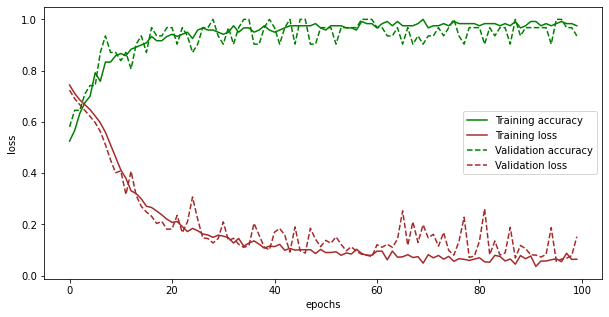

In [30]:
vis_evl(hist)

###### Green dots are target 🎯 values AND red dots are predictions of DL model

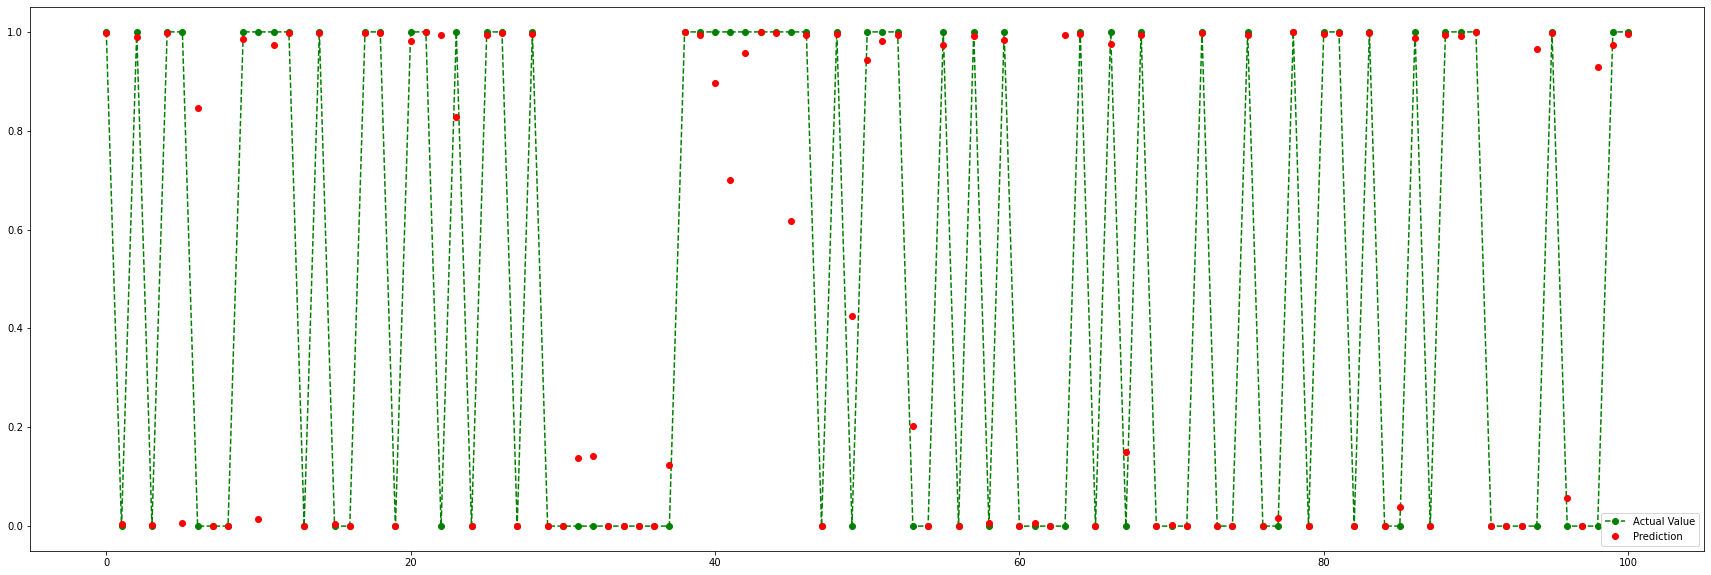

In [31]:
pre_tar(p, label_y)

### Target & Prediction in DataFrame

In [32]:
def pred_frame(pre_val,tar_val):
    #DataFrame
    dd = pd.DataFrame(tar_val, columns=['Target'])
    dd['Predict_rounded'] = np.round(pre_val)
    dd['Prediction']=pre_val
#     dd['Percentage']=(dd.Prediction / dd.Target)*100
    
    display(dd)

In [33]:
pred_frame(p, label_y)

Target  Predict_rounded    Prediction
0         1              1.0  9.982977e-01
1         0              0.0  4.209578e-03
2         1              1.0  9.897846e-01
3         0              0.0  2.218544e-03
4         1              1.0  9.982107e-01
5         1              0.0  5.922854e-03
6         0              1.0  8.456546e-01
7         0              0.0  4.351845e-08
8         0              0.0  1.716018e-04
9         1              1.0  9.854128e-01
10        1              0.0  1.381987e-02
11        1              1.0  9.729270e-01
12        1              1.0  9.985695e-01
13        0              0.0  3.464264e-08
14        1              1.0  9.974357e-01
15        0              0.0  4.233927e-03
16        0              0.0  5.073555e-07
17        1              1.0  9.986560e-01
18        1              1.0  9.986131e-01
19        0              0.0  2.238246e-08
20        1              1.0  9.814018e-01
21        1              1.0  9.989356e-01
22        0              1.0  9.941243e-01
23        1              1.0  8.282199e-01
24        0              0.0  4.100204e-04
25        1              1.0  9.929363e-01
26        1              1.0  9.975169e-01
27        0              0.0  9.415745e-05
28        1              1.0  9.948775e-01
29        0              0.0  1.050301e-06
30        0              0.0  5.524307e-06
31        0              0.0  1.371809e-01
32        0              0.0  1.415292e-01
33        0              0.0  1.239950e-05
34        0              0.0  5.866365e-12
35        0              0.0  9.687135e-13
36        0              0.0  1.519024e-04
37        0              0.0  1.234351e-01
38        1              1.0  9.988155e-01
39        1              1.0  9.937050e-01
40        1              1.0  8.973835e-01
41        1              1.0  6.999576e-01
42        1              1.0  9.572599e-01
43        1              1.0  9.989816e-01
44        1              1.0  9.984381e-01
45        1              1.0  6.166254e-01
46        1              1.0  9.939764e-01
47        0              0.0  2.052092e-07
48        1              1.0  9.965197e-01
49        0              0.0  4.261317e-01
50        1              1.0  9.439542e-01
51        1              1.0  9.815058e-01
52        1              1.0  9.932554e-01
53        0              0.0  2.020057e-01
54        0              0.0  3.748680e-07
55        1              1.0  9.740798e-01
56        0              0.0  3.744364e-04
57        1              1.0  9.924616e-01
58        0              0.0  5.339026e-03
59        1              1.0  9.830533e-01
60        0              0.0  3.161697e-09
61        0              0.0  6.149322e-03
62        0              0.0  1.142769e-06
63        0              1.0  9.944555e-01
64        1              1.0  9.966656e-01
65        0              0.0  2.790726e-07
66        1              1.0  9.763551e-01
67        0              0.0  1.497139e-01
68        1              1.0  9.946169e-01
69        0              0.0  7.317694e-06
70        0              0.0  2.412677e-03
71        0              0.0  6.726682e-04
72        1              1.0  9.977618e-01
73        0              0.0  7.995361e-05
74        0              0.0  1.922425e-07
75        1              1.0  9.946994e-01
76        0              0.0  1.089347e-15
77        0              0.0  1.737151e-02
78        1              1.0  9.988340e-01
79        0              0.0  6.068306e-06
80        1              1.0  9.950060e-01
81        1              1.0  9.971578e-01
82        0              0.0  4.081814e-06
83        1              1.0  9.980416e-01
84        0              0.0  1.748018e-09
85        0              0.0  3.791356e-02
86        1              1.0  9.881371e-01
87        0              0.0  4.546296e-15
88        1              1.0  9.927406e-01
89        1              1.0  9.927005e-01
90        1              1.0  9.988819e-01
91        0              0.0  1.239733e-09
92    

In [34]:
num_val = len(data_X)//4
num_val

37

In [35]:
data_X.shape, label_Y.shape

((151, 33), (151,))

In [36]:
aa = pd.concat([mm_tr_x, mm_te_x])
bb = pd.concat([train_y, test_y])
display(aa,bb)

feature1  feature3  feature4  feature5  feature6  feature7  feature8  \
37        0.0  1.000000  1.000000  1.000000  0.000000  0.500000  0.500000   
202       1.0  0.500000  0.500000  0.500000  0.500000  0.500000  0.500000   
350       1.0  0.923550  0.567665  0.868190  0.469245  0.939365  0.541300   
299       1.0  0.917395  0.644965  0.846280  0.738510  0.746170  0.841905   
121       1.0  1.000000  0.037735  1.000000  0.877360  0.745285  0.471700   
219       1.0  0.967685  0.568225  0.968580  0.626795  0.928525  0.693895   
76        1.0  1.000000  0.520390  1.000000  0.559910  1.000000  0.580795   
226       0.0  0.500000  0.500000  1.000000  1.000000  1.000000  1.000000   
232       0.0  1.000000  1.000000  0.000000  0.000000  0.000000  0.000000   
301       1.0  0.916835  0.657280  0.827705  0.788355  0.674810  0.853385   
153       1.0  0.973265  0.643565  0.862770  0.836240  0.737820  0.912275   
161       1.0  0.928680  0.500375  0.909635  0.471620  0.887605  0.479090   
250       1.0  0.500000  0.500000  0.500000  0.500000  1.000000  1.000000   
51        0.0  1.000000  1.000000  1.000000  0.000000  0.500000  0.500000   
32        1.0  0.941040  0.426805  0.967040  0.444715  0.960500  0.417750   
312       1.0  1.000000  0.580975  1.000000  0.472210  1.000000  0.506865   
319       1.0  0.925065  0.509045  0.961055  0.507280  0.960230  0.510900   
177       1.0  0.958335  0.645835  0.916665  0.416665  0.854165  0.625000   
171       1.0  1.000000  0.500000  1.000000  0.500000  0.833335  0.555555   
65        1.0  0.923915  0.552990  1.000000  0.695650  1.000000  0.000000   
207       1.0  0.736840  0.447370  0.918905  0.508780  0.915775  0.513075   
94        1.0  0.646010  0.567910  0.726655  0.584040  0.758915  0.497455   
263       1.0  0.947050  0.567125  0.935005  0.657715  0.894480  0.716940   
200       0.0  0.500000  0.500000  0.500000  0.500000  0.500000  0.500000   
233       1.0  0.752330  0.415500  0.857210  0.507565  0.855315  0.511290   
149       1.0  0.951870  0.491980  1.000000  0.540105  1.000000  0.508020   
158       1.0  0.543480  0.503430  0.569795  0.479405  0.552630  0.458810   
197       1.0  1.000000  0.615290  1.000000  0.107455  1.000000  0.447995   
69        1.0  1.000000  1.000000  1.000000  0.000000  1.000000  0.000000   
244       1.0  0.500000  0.500000  1.000000  0.564445  0.942220  0.490000   
77        0.0  1.000000  1.000000  1.000000  0.000000  1.000000  1.000000   
208       1.0  0.496795  0.250000  0.500000  0.500000  0.490385  1.000000   
303       1.0  0.970260  0.492345  0.970850  0.505005  0.974970  0.492640   
195       1.0  0.968345  0.499050  0.803805  0.716020  0.961570  0.299355   
55        1.0  0.541665  0.396575  0.000000  1.000000  0.000000  1.000000   
168       0.0  0.500000  0.500000  0.500000  0.500000  0.500000  0.500000   
307       1.0  0.756035  1.000000  1.000000  0.769050  0.855890  0.904165   
293       1.0  0.938860  0.459240  0.917120  0.536685  0.923915  0.520380   
192       1.0  0.500000  0.500000  0.500000  0.500000  0.500000  0.500000   
96        1.0  0.950580  0.583035  0.896495  0.686895  0.864950  0.752575   
24        1.0  1.000000  0.469090  1.000000  0.514710  1.000000  0.474345   
27        0.0  0.000000  0.000000  0.500000  0.500000  0.000000  1.000000   
298       1.0  0.941205  0.653170  0.866160  0.789080  0.670545  0.792635   
31        1.0  1.000000  0.000000  1.000000  1.000000  1.000000  0.000000   
321       1.0  0.947525  0.484160  0.937625  0.527725  0.947525  0.506930   
110       1.0  0.829545  0.185605  0.500000  0.500000  0.500000  0.500000   
3         1.0  1.000000  0.274195  1.000000  1.000000  0.856080  0.000000   
320       1.0  1.000000  0.494105  1.000000  0.498285  1.000000  0.492175   
39        1.0  1.000000  0.512305  0.998360  0.524305  0.987725  0.535715   
181       1.0  1.000000  0.620385  0.999075  0.501845  0.901220  0.349335   
182       0.0  0.000000  1.000000  1.000000  0.000000  0.500000  0.500000   
1

37     0
202    0
350    1
299    1
121    1
219    1
76     1
226    0
232    0
301    1
153    1
161    1
250    0
51     0
32     1
312    1
319    1
177    1
171    1
65     0
207    1
94     1
263    1
200    0
233    1
149    1
158    0
197    1
69     0
244    0
77     0
208    0
303    1
195    1
55     0
168    0
307    1
293    1
192    0
96     1
24     1
27     0
298    1
31     0
321    1
110    0
3      0
320    1
39     0
181    1
182    0
1      0
102    0
191    1
156    0
230    0
159    1
83     0
99     1
125    1
5      0
89     0
72     1
284    1
117    1
44     1
23     0
53     0
272    1
9      0
127    1
88     1
335    1
137    1
253    1
176    0
160    0
163    1
66     1
13     0
70     1
82     1
229    1
332    1
87     0
220    0
204    0
174    0
60     1
236    0
194    0
93     0
222    0
135    1
28     1
67     0
162    0
104    0
126    0
120    0
56     1
29     0
79     0
336    1
59     0
342    1
22     1
212    0
61     0
260    1
58     1
4

In [37]:
ar = np.array(aa)
br = np.array(bb)
display(ar,br, ar.shape, br.shape)

array([[0.      , 1.      , 1.      , ..., 1.      , 0.5     , 0.5     ],
       [1.      , 0.5     , 0.5     , ..., 1.      , 0.5     , 0.5     ],
       [1.      , 0.92355 , 0.567665, ..., 0.46661 , 0.92882 , 0.469245],
       ...,
       [1.      , 1.      , 0.472355, ..., 0.18422 , 1.      , 0.170325],
       [1.      , 0.971655, 0.599795, ..., 0.410395, 0.16534 , 0.328165],
       [1.      , 1.      , 0.46698 , ..., 0.107225, 1.      , 0.25874 ]])

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

(252, 33)

(252,)

# K-Fold 

2/2 [==============================] - 0s 0s/step - loss: 0.3728 - accuracy: 0.8571


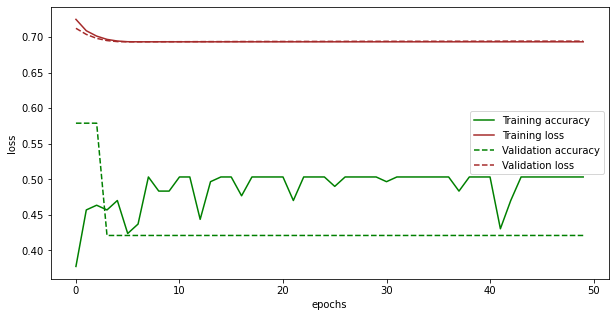

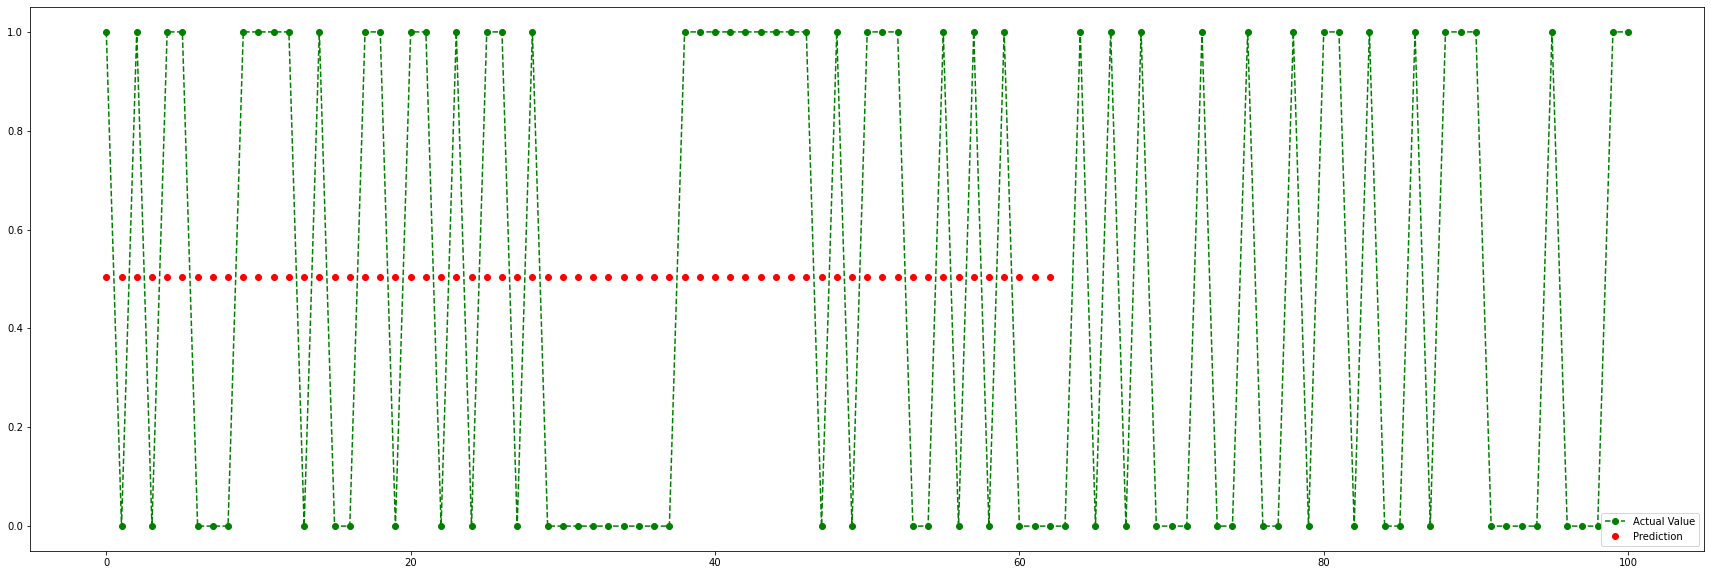

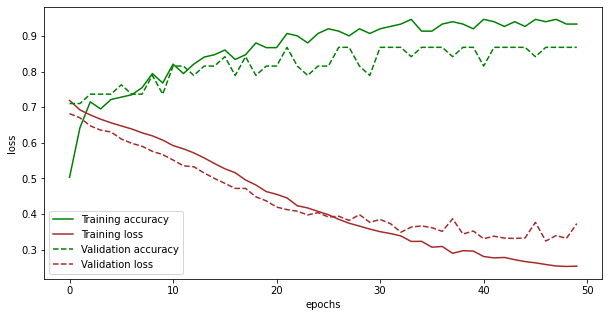

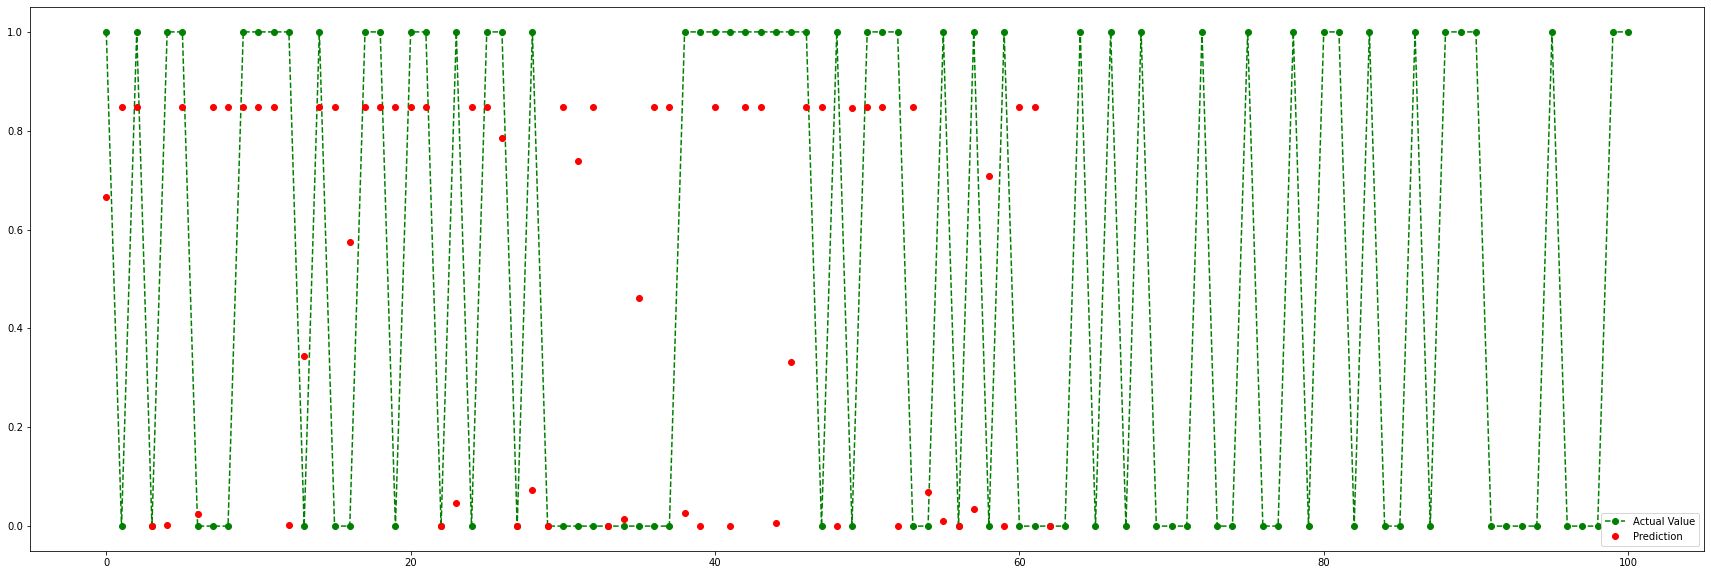

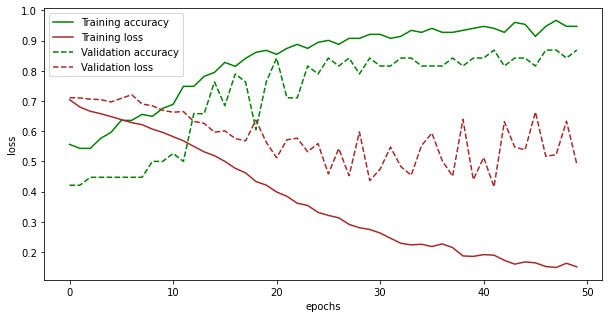

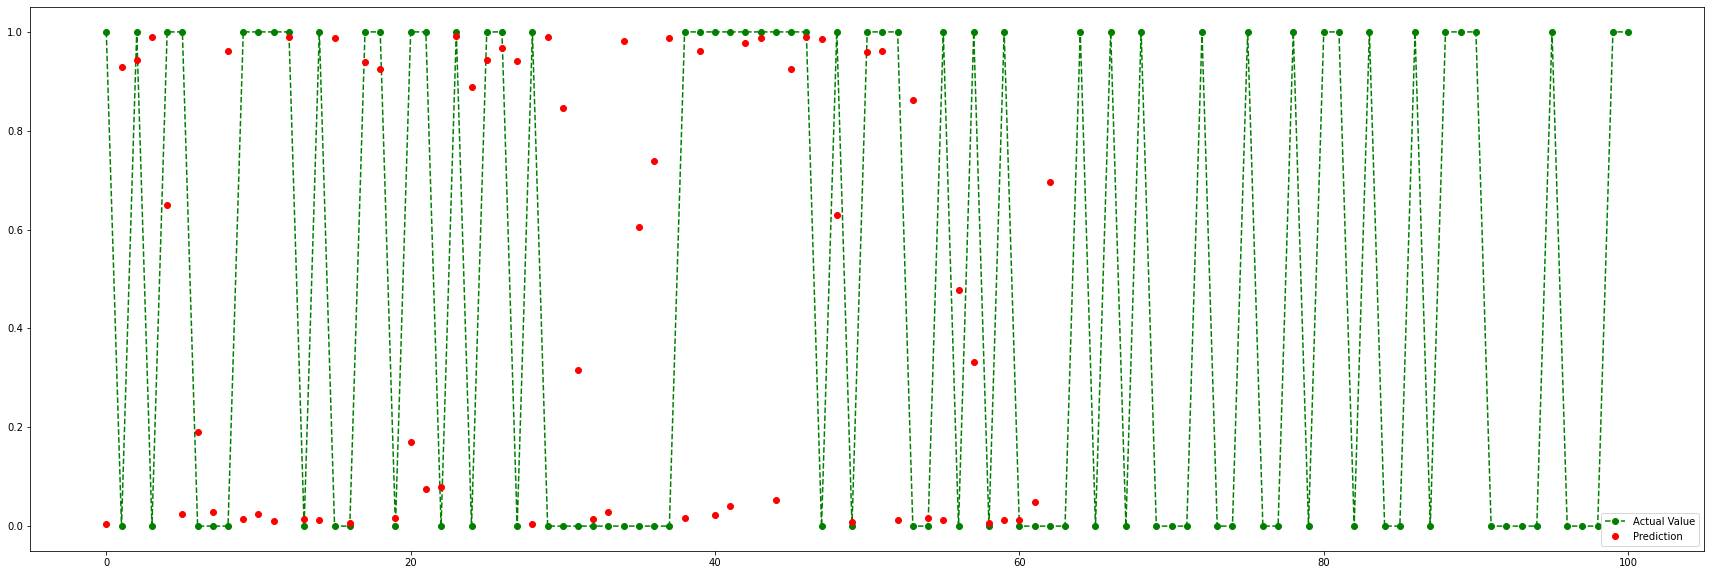

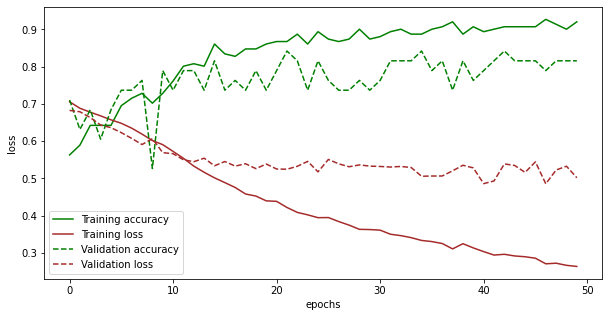

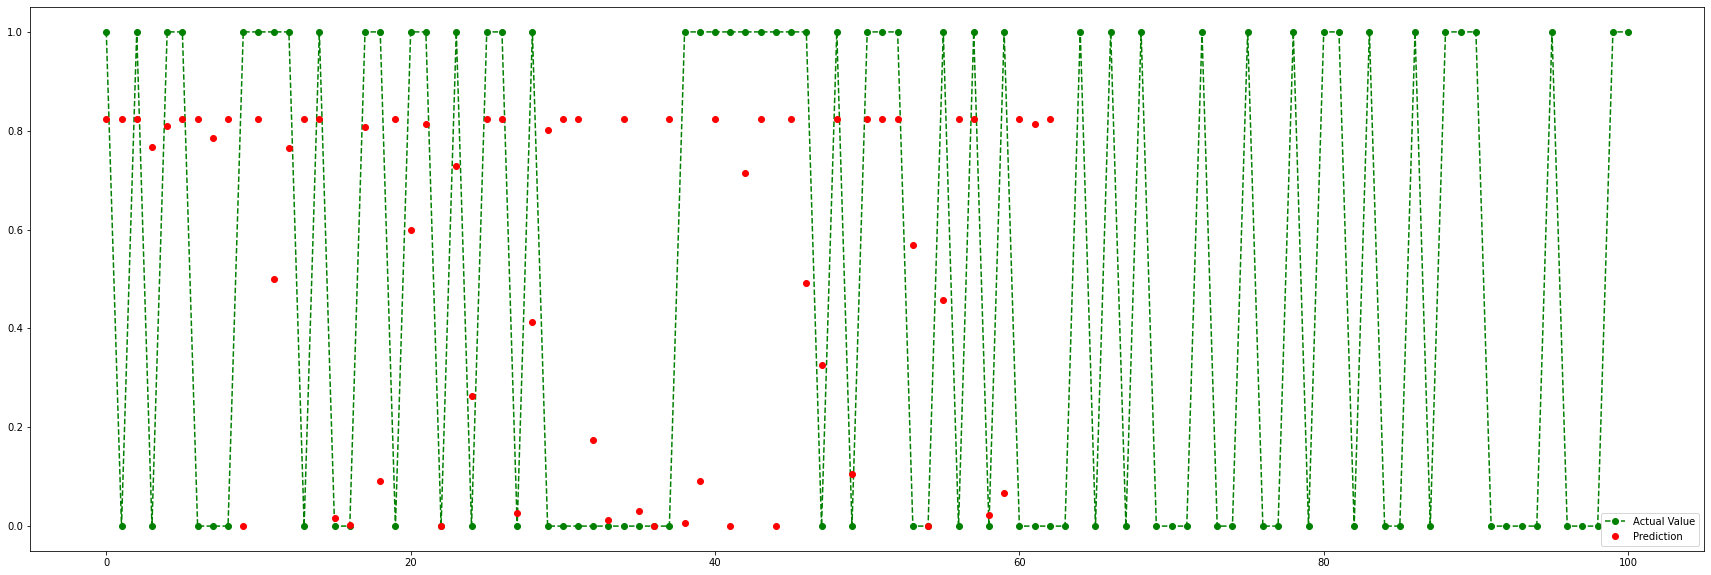

In [38]:
k = 4
num_val = len(ar)//k
v_l = []
v_a = []

for fold in range(k):
    valid_data = ar[num_val*fold : num_val * (fold+1)]
    valid_targ = br[num_val*fold : num_val * (fold+1)]
    
    train_data = np.concatenate([ar[:num_val*fold] , ar[num_val * (fold+1) :]],axis=0)
    train_targ = np.concatenate([br[:num_val*fold] , br[num_val * (fold+1) :]],axis=0)

    
    model = simp('relu',6,4,2,train_data)
    hist = model.fit(train_data,train_targ, epochs= 50, validation_split = 0.2 ,batch_size = 1, verbose=0)
    vis_evl(hist)
    
    l,e  = model.evaluate(valid_data, valid_targ )
    p = model.predict(valid_data)
    pre_tar(p, label_y)    
    v_l.append(l)
    v_a.append(e)
    

In [39]:
print('mean of k-fold loss:     ',np.mean(v_l),'\nmean of k-fold accuracy: ',np.mean(v_a))

mean of k-fold loss:      0.4077751412987709 
mean of k-fold accuracy:  0.8095238208770752


### The accuracy and loss of simple model was good as compaired to k-fold model